In [5]:
from gensim.models import Word2Vec
# both TSNE / PCA do dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [6]:
sentences = [['this', 'is', 'a', 'very', 'good', 'NLP', 'course'],
            ['this', 'is', 'a', 'NLP', 'course'],
            ['Word2Vec','NLP','text'],
            ['word', 'embedding','NLP'],
            ['NLP','course','Word2Vec','embedding']]

In [7]:
model = Word2Vec(sentences, min_count=1) # create the word2vec model based on our vocab

In [8]:
print(model) # each word is an 100 in length vector

Word2Vec(vocab=11, size=100, alpha=0.025)


In [9]:
print(list(model.wv.vocab))

['this', 'is', 'a', 'very', 'good', 'NLP', 'course', 'Word2Vec', 'text', 'word', 'embedding']


In [11]:
print(model['NLP'])
print(len(model['NLP']))

[-3.3355679e-03 -4.0251671e-04  4.4012093e-03  1.8692019e-03
 -3.2919780e-03 -3.5145909e-03  4.4524699e-04 -2.1825434e-05
 -5.0153548e-04  3.0586133e-03  4.1004708e-03  1.4938911e-03
  2.6218249e-03 -2.5638104e-03 -3.7240034e-03 -3.5469034e-03
 -1.3101952e-03 -6.9961541e-05 -8.5494580e-04 -4.0686275e-03
 -7.3654484e-04 -2.9474094e-03 -1.3172880e-03 -2.7598492e-03
  2.7344816e-03 -4.6310211e-03 -3.5621163e-03  2.0467241e-03
  1.3394436e-03  2.2245548e-03  2.8741469e-03  7.0528295e-05
 -2.3414299e-03  1.0944994e-03  1.2759401e-03  3.8099475e-03
 -3.7466572e-03 -4.4363183e-03  4.4239764e-03 -1.4681310e-03
 -4.6419860e-03 -1.8039530e-03 -1.0634732e-03 -2.7681624e-03
 -3.7542051e-03  4.0769582e-03  3.5840820e-03 -5.6939089e-04
 -4.7341296e-03  4.5639174e-03  4.1138981e-03 -1.9062455e-03
  4.6095462e-03 -1.7798723e-04 -3.4684273e-03 -2.1166469e-03
 -3.2133623e-03 -4.4018263e-03 -2.2905642e-05 -1.5948927e-03
 -3.8338671e-03 -9.3041657e-04  3.3846342e-03 -2.5558044e-04
  2.7070881e-03  3.78620

/home/babak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/home/babak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [13]:
model.save('word_embeddings_model.bin') # save the model

In [14]:
new_model = Word2Vec.load('word_embeddings_model.bin') # load the model
print(new_model)

Word2Vec(vocab=11, size=100, alpha=0.025)


In [15]:
model.wv.vocab  # it is a dictionary with each word and its related vector

{'this': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8b978>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8b5f8>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8b470>,
 'very': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8bbe0>,
 'good': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8b198>,
 'NLP': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8b240>,
 'course': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8bc50>,
 'Word2Vec': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8bc18>,
 'text': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8bf28>,
 'word': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8bf60>,
 'embedding': <gensim.models.keyedvectors.Vocab at 0x7f5a9bc8be80>}

In [17]:
X = model[model.wv.vocab]
print(X.shape)

(11, 100)


/home/babak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [19]:
# dimentionality Reduction:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

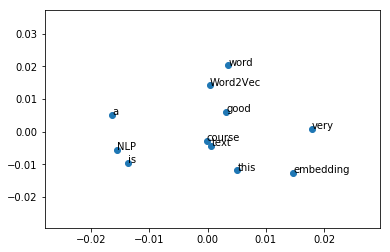

In [22]:
# since the corpus is too small we won't get good results

plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
                # text to show  # location of the text 
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()